# Interface SQL-Python

In [41]:
import sqlite3
conn = sqlite3.connect('billboard-200.db')
c = conn.cursor()
from matplotlib import rcParams
rcParams['figure.figsize'] = 19, 8

In [3]:
sql_1 = c.execute('SELECT artist, album FROM albums WHERE date > 2002-03-07 AND rank = 1 GROUP BY album LIMIT 10')

In [4]:
for row in sql_1:
    print(row)

("Destiny's Child", "#1's")
('DMX', '...And Then There Was X')
('Britney Spears', '...Baby One More Time')
('Queens Of The Stone Age', '...Like Clockwork')
('Rob Thomas', '...Something To Be')
('Slipknot', '.5: The Gray Chapter')
('The Beatles', '1')
('Tool', '10,000 Days')
('Sia', '1000 Forms Of Fear')
('Black Sabbath', '13')


In [5]:
sql_2 =  c.execute('SELECT artist, album FROM albums WHERE rank = 1 GROUP BY album LIMIT 10')

In [6]:
for row in sql_2:
    print(row)

('Herb Alpert & The Tijuana Brass', '!!Going Places!!')
("Destiny's Child", "#1's")
('DMX', '...And Then There Was X')
('Britney Spears', '...Baby One More Time')
('Phil Collins', '...But Seriously')
('Queens Of The Stone Age', '...Like Clockwork')
('Rob Thomas', '...Something To Be')
('Slipknot', '.5: The Gray Chapter')
('The Beatles', '1')
('Tool', '10,000 Days')


# Interface SQL-Pandas

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
acoustik_features = 'SELECT * FROM acoustic_features'
df_sql = pd.read_sql(acoustik_features, conn)

In [9]:
df_sql.dropna(inplace=True)

In [10]:
df_sql.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 339850 entries, 0 to 339854
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                339850 non-null  object 
 1   song              339850 non-null  object 
 2   album             339850 non-null  object 
 3   artist            339850 non-null  object 
 4   acousticness      339850 non-null  float64
 5   danceability      339850 non-null  float64
 6   duration_ms       339850 non-null  float64
 7   energy            339850 non-null  float64
 8   instrumentalness  339850 non-null  float64
 9   key               339850 non-null  float64
 10  liveness          339850 non-null  float64
 11  loudness          339850 non-null  float64
 12  mode              339850 non-null  float64
 13  speechiness       339850 non-null  float64
 14  tempo             339850 non-null  float64
 15  time_signature    339850 non-null  float64
 16  valence           33

In [11]:
df_sql['Date'] = pd.to_datetime(df_sql['date'])

In [12]:
df_sql.drop('date', axis=1, inplace=True)

In [13]:
df_sql.set_index('Date', inplace=True)

In [14]:
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 339850 entries, 2018-12-21 to 1963-01-01
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                339850 non-null  object 
 1   song              339850 non-null  object 
 2   album             339850 non-null  object 
 3   artist            339850 non-null  object 
 4   acousticness      339850 non-null  float64
 5   danceability      339850 non-null  float64
 6   duration_ms       339850 non-null  float64
 7   energy            339850 non-null  float64
 8   instrumentalness  339850 non-null  float64
 9   key               339850 non-null  float64
 10  liveness          339850 non-null  float64
 11  loudness          339850 non-null  float64
 12  mode              339850 non-null  float64
 13  speechiness       339850 non-null  float64
 14  tempo             339850 non-null  float64
 15  time_signature    339850 non-null  float64
 16  vale

In [15]:
# Effectuez la moyenne par année de toutes les caractéristiques. Quelle est la tendance que  vous constatez ? 
df_sql.groupby(df_sql.index.year).mean()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
Date,,,,,,,,,,,,,
1900,0.038448,0.363750,216361.166667,0.624083,0.000373,6.416667,0.196208,-9.729333,0.666667,0.038833,133.889250,3.833333,0.389500
1933,0.896780,0.687720,177955.000000,0.278340,0.018708,5.480000,0.197766,-11.930940,0.680000,0.059456,119.815680,3.980000,0.722960
1941,0.712571,0.456500,181861.000000,0.237207,0.004762,3.714286,0.218300,-13.844214,0.714286,0.048771,104.562929,3.928571,0.361564
1944,0.941444,0.331889,185583.722222,0.141528,0.024910,5.388889,0.300444,-17.104444,0.777778,0.045033,111.061167,3.555556,0.289772
1946,0.900937,0.523750,187104.625000,0.271750,0.038312,4.937500,0.167525,-11.483688,0.937500,0.072556,112.294562,3.875000,0.576250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.266103,0.532740,235340.950129,0.641605,0.115629,5.247882,0.229030,-8.017984,0.674107,0.091737,120.651579,3.888619,0.441328
2016,0.280247,0.539637,233214.295504,0.630402,0.101624,5.213537,0.220787,-7.955032,0.675511,0.095675,120.656077,3.873754,0.443337
2017,0.275792,0.551348,223948.277797,0.630018,0.107876,5.180572,0.217876,-7.919609,0.658986,0.099882,120.301062,3.885301,0.440722


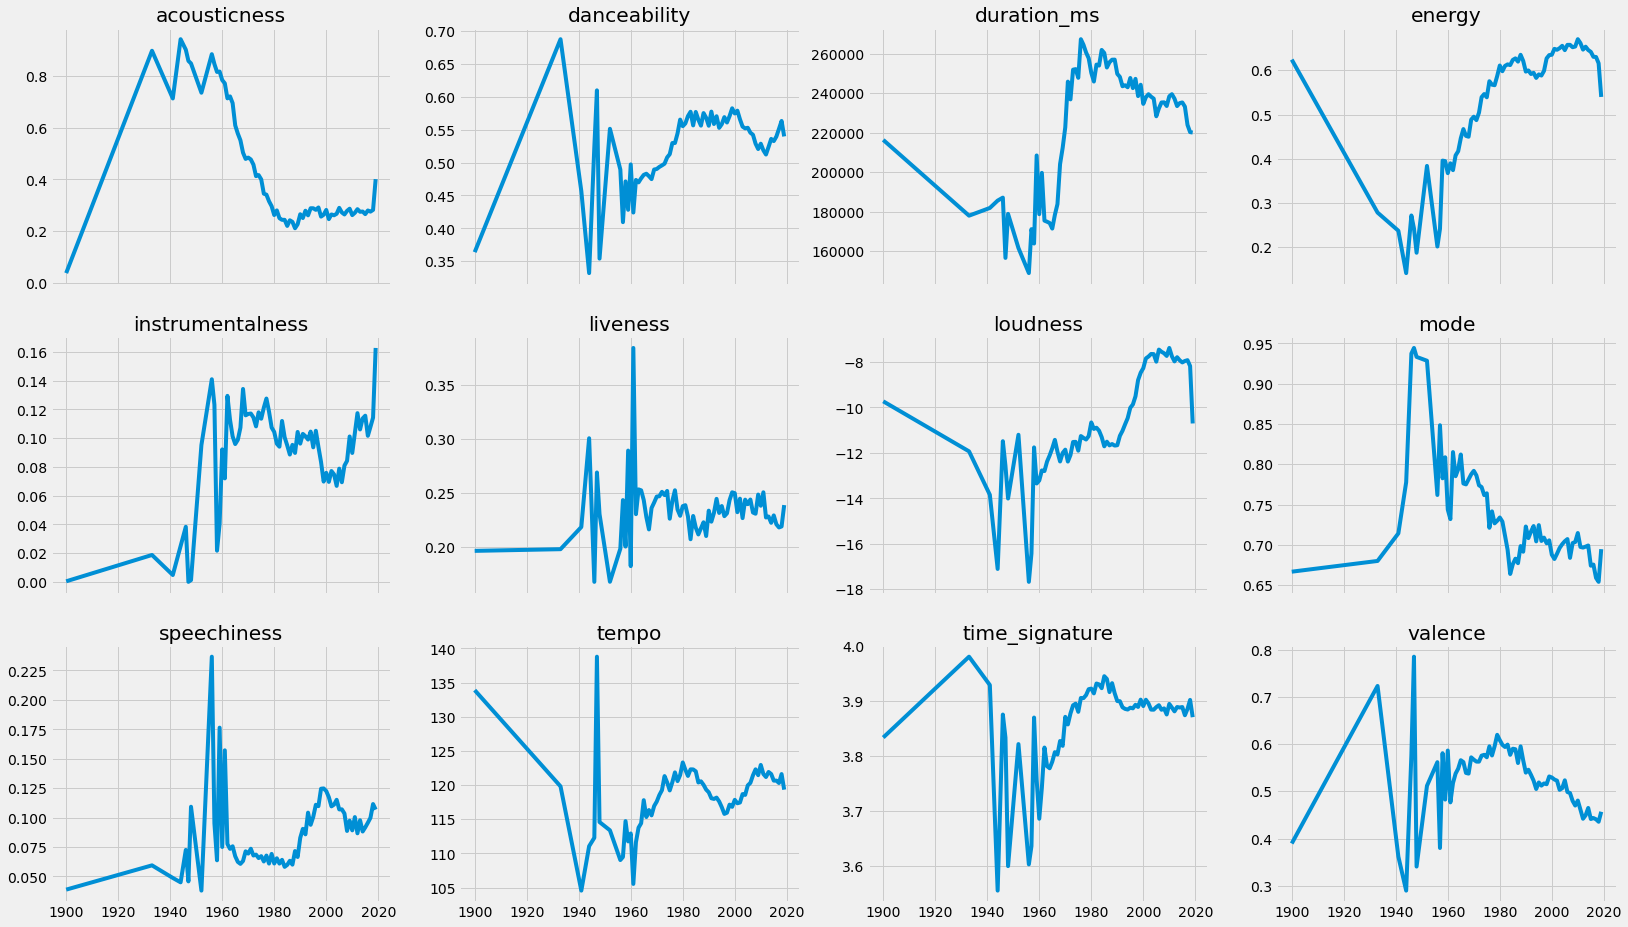

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('billboard-200.db')
df_sql = pd.read_sql(acoustik_features, conn)
df_sql.set_index(pd.to_datetime(df_sql.date), inplace=True)

means = df_sql.groupby(df_sql.index.year).mean().drop('key', axis=1)

with plt.style.context('fivethirtyeight'):
    fig, axes = plt.subplots(3, 4, figsize=(25, 15), sharex=True)
    for i, col in enumerate(means):
        axes[i//4, i%4].plot(means[col])
        axes[i//4, i%4].set_title(col)

In [17]:
# Quelle est l'année dont le niveau sonore "loudness" a été le plus haut

df_sql.groupby(df_sql.index.year).mean().loudness.nlargest(2) # nlargest donne la valeur la plus grande ainsi que son index

date
2010   -7.381287
2006   -7.452384
Name: loudness, dtype: float64

In [18]:
df_sql

,id,song,album,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,album_id,date
date,,,,,,,,,,,,,,,,,,,
2018-12-21,0Veyvc3n9AcLSoK3r1dA12,Voices In My Head,Hoodie SZN,A Boogie Wit da Hoodie,0.0555,0.754,142301.0,0.663,0.000000,6.0,0.101,-6.311,0.0,0.4270,90.195,4.0,0.207,3r5hf3Cj3EMh1C2saQ8jyt,2018-12-21
2018-12-21,77JzXZonNumWsuXKy9vr3U,Beasty,Hoodie SZN,A Boogie Wit da Hoodie,0.2920,0.860,152829.0,0.418,0.000000,7.0,0.106,-9.061,0.0,0.1580,126.023,4.0,0.374,3r5hf3Cj3EMh1C2saQ8jyt,2018-12-21
2018-12-21,18yllZD0TdF7ykcREib8Z1,I Did It,Hoodie SZN,A Boogie Wit da Hoodie,0.1530,0.718,215305.0,0.454,0.000046,8.0,0.116,-9.012,1.0,0.1270,89.483,4.0,0.196,3r5hf3Cj3EMh1C2saQ8jyt,2018-12-21
2018-12-21,1wJRveJZLSb1rjhnUHQiv6,Swervin (feat. 6ix9ine),Hoodie SZN,A Boogie Wit da Hoodie,0.0153,0.581,189487.0,0.662,0.000000,9.0,0.111,-5.239,1.0,0.3030,93.023,4.0,0.434,3r5hf3Cj3EMh1C2saQ8jyt,2018-12-21
2018-12-21,0jAfdqv18goRTUxm3ilRjb,Startender (feat. Offset and Tyga),Hoodie SZN,A Boogie Wit da Hoodie,0.0235,0.736,192779.0,0.622,0.000000,6.0,0.151,-4.653,0.0,0.1330,191.971,4.0,0.506,3r5hf3Cj3EMh1C2saQ8jyt,2018-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963-01-01,1EU8l9SctgP0gwIFxdjKPA,It'S A Raggy Waltz - Live,The Dave Brubeck Quartet At Carnegie Hall,The Dave Brubeck Quartet,0.6550,0.445,434427.0,0.544,0.000325,8.0,0.235,-11.662,1.0,0.0792,176.723,3.0,0.654,4My0KPjdtzCUfFjToOCiPh,1963
1963-01-01,4a0J3zWWe5IXdwWWQSypjq,King For A Day - Live,The Dave Brubeck Quartet At Carnegie Hall,The Dave Brubeck Quartet,0.8350,0.600,375533.0,0.172,0.865000,8.0,0.421,-22.897,1.0,0.0672,135.005,4.0,0.458,4My0KPjdtzCUfFjToOCiPh,1963
1963-01-01,28VEEbzNdg6r5gQFY5wWI3,Castilian Drums - Live,The Dave Brubeck Quartet At Carnegie Hall,The Dave Brubeck Quartet,0.1920,0.459,861933.0,0.606,0.612000,10.0,0.398,-13.427,0.0,0.0645,116.325,4.0,0.359,4My0KPjdtzCUfFjToOCiPh,1963


In [19]:
# Quelle est la clé musicale la plus populaire - en prenant en compte le mode (e.g. majeur(1),  mineur(0)) ? 

df_notes = df_sql.groupby(['mode', 'key']).size().nlargest(24)


In [20]:
df_notes

mode  key 
1.0   7.0     35389
      0.0     34846
      2.0     32562
      9.0     25758
      1.0     21455
      5.0     18363
      4.0     15067
      8.0     15024
0.0   11.0    13656
1.0   10.0    12274
0.0   4.0     12118
      9.0     11980
1.0   6.0     10848
      11.0    10793
0.0   10.0     9753
      5.0      9466
      6.0      8684
      1.0      7752
1.0   3.0      7453
0.0   7.0      6750
      2.0      6536
      0.0      6257
      8.0      4120
      3.0      2946
dtype: int64

In [21]:
df_index = df_sql.groupby(df_sql.index.year).mean()

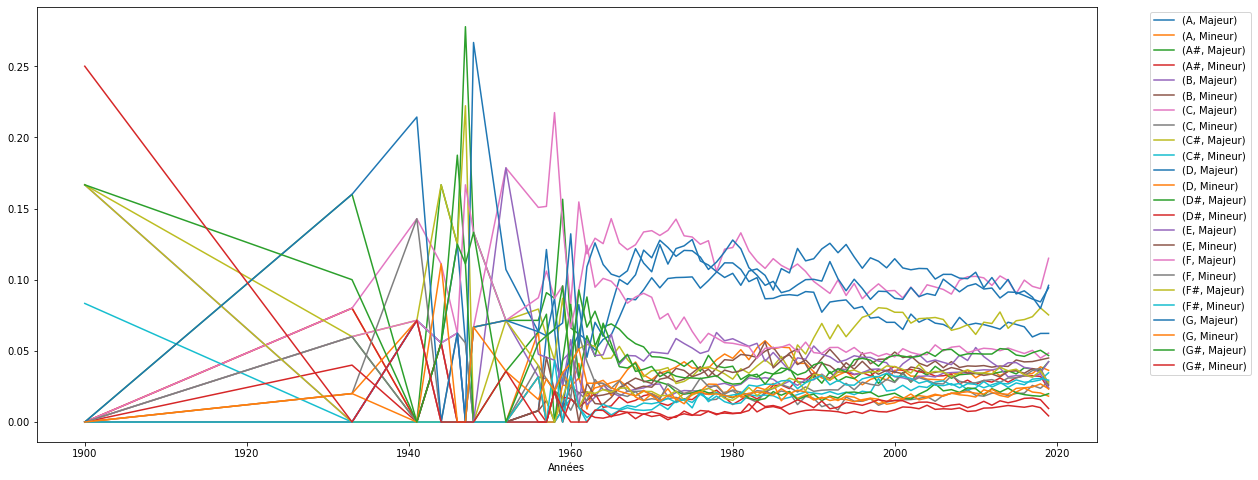

In [42]:
df_sql.key.replace([0,1,2,3,4,5,6,7,8,9,10,11], ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'],inplace = True)
df_sql['mode'].replace([1,0],['Majeur', 'Mineur'], inplace=True)
pd.crosstab([df_sql['key'], df_sql['mode']], df_sql.index.year, normalize='columns').T.plot()
plt.xlabel("Années")
plt.legend(bbox_to_anchor=(1.15, 1.0))
plt.show()

# Insertion des données via Pandas

In [23]:
import sqlite3
conn = sqlite3.connect('GTFS_tag.db')
c = conn.cursor()
from matplotlib import rcParams
rcParams['figure.figsize'] = 19, 8

In [24]:
agency =  "SELECT * FROM agency"

df_agency = pd.read_sql(agency, conn)

In [25]:
df_agency

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,SEM,Mobilités M - Tag,https://www.mobilites-m.fr/,Europe/Paris,FR,438703870


In [26]:
df_agency = pd.read_csv("SEM-GTFS/agency.txt")

In [27]:
df_agency

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,SEM,Mobilités M - Tag,https://www.mobilites-m.fr/,Europe/Paris,FR,438703870


In [28]:
df_agency.to_sql("agency",conn, if_exists="append", index=False) #if exists ="replace" pour ajouter les colonnes auto

In [29]:
stops = "SELECT * FROM stops"

df_stops =  pd.read_sql(stops, conn)


In [30]:
df_stops = pd.read_csv("SEM-GTFS/stops.txt")

In [31]:
df_stops

,stop_id,stop_code,stop_name,stop_lat,stop_lon,zone_id,location_type,parent_station,wheelchair_boarding
0,0004,0004,"Meylan, Revirée - Sayettes",45.21220,5.76728,NaN,NaN,REVIREES,0
1,0006,0006,"La Tronche, Commandant Nal",45.20323,5.74535,NaN,NaN,COMMANAL,1
2,0007,0007,"La Tronche, Musée Hébert",45.20564,5.74888,NaN,NaN,MUSHEBER,1
3,0008,0008,"La Tronche, Centre Théologique",45.20617,5.75214,NaN,NaN,CENTHEOL,1
4,0011,0011,"Meylan, Malacher",45.21128,5.78724,NaN,NaN,MALACHER,1
...,...,...,...,...,...,...,...,...,...
2379,VOHRIGEN,GENVOHRIGEN,"Vizille, Parc Vöhringen",45.07888,5.76947,NaN,1.0,NaN,0
2380,XAVJOUVI,GENXAVJOUVI,"Grenoble, Xavier Jouvin",45.19560,5.73009,NaN,1.0,NaN,0
2381,ZASPEYRE,GENZASPEYRE,"Vif, Z.A. des Speyres",45.05690,5.68184,NaN,1.0,NaN,0
2382,ZELLAMEL,GENZELLAMEL,"Saint-Martin-d'Hères, Zella Mehlis",45.16707,5.75354,NaN,1.0,NaN,0


In [32]:
df_stops.to_sql("stops",conn, if_exists="append", index=False)

In [33]:
routes = "SELECT * FROM routes"

df_routes =  pd.read_sql(routes, conn)

In [34]:
df_routes = pd.read_csv("SEM-GTFS/routes.txt")

In [35]:
df_routes.to_sql("routes",conn, if_exists="replace", index=False)

# Insertion des données via bulk insert

In [36]:

import sqlite3
from sqlite3 import Error
import pandas as pd

liste_attributes =['agency',
                   'stops',
                   'routes',
                   'trips',
                   'stop_times']

liste_CSV_FILE_PATH =['SEM-GTFS/agency.txt',
                      'SEM-GTFS/stops.txt',
                      'SEM-GTFS/routes.txt',
                      'SEM-GTFS/trips.txt',
                      'SEM-GTFS/stop_times.txt',]
    
DB_FILE_PATH = 'GTFS_tag.db'
CSV_FILE_PATH = 'SEM-GTFS/trips.txt'


def connect_to_db(db_file):
    """
    Connect to an SQlite database, if db file does not exist it will be created
    :param db_file: absolute or relative path of db file
    :return: sqlite3 connection
    """
    sqlite3_conn = None

    try:
        sqlite3_conn = sqlite3.connect(db_file)
        return sqlite3_conn

    except Error as err:
        print(err)

        if sqlite3_conn is not None:
            sqlite3_conn.close()


def insert_values_to_table(table_name, csv_file):
    """
    Open a csv file with pandas, store its content in a pandas data frame, change the data frame headers to the table
    column names and insert the data to the table
    :param table_name: table name in the database to insert the data into
    :param csv_file: path of the csv file to process
    :return: None
    """

    conn = connect_to_db(DB_FILE_PATH)

    if conn is not None:
        c = conn.cursor()

        # Create table if it is not exist
        # c.execute('CREATE TABLE IF NOT EXISTS ' + table_name +)

        df = pd.read_csv(csv_file)

        df.columns = get_column_names_from_db_table(c, table_name)

        df.to_sql(name=table_name, con=conn, if_exists='replace', index=False)

        conn.close()
        print('SQL insert process finished')
    else:
        print('Connection to database failed')


def get_column_names_from_db_table(sql_cursor, table_name):
    """
    Scrape the column names from a database table to a list
    :param sql_cursor: sqlite cursor
    :param table_name: table name to get the column names from
    :return: a list with table column names
    """

    table_column_names = 'PRAGMA table_info(' + table_name + ');'
    sql_cursor.execute(table_column_names)
    table_column_names = sql_cursor.fetchall()

    column_names = list()

    for name in table_column_names:
        column_names.append(name[1])

    return column_names


if __name__ == '__main__':
    
    for attribute, CSV_FILE_PATH in zip(liste_attributes, liste_CSV_FILE_PATH):
        insert_values_to_table(attribute, CSV_FILE_PATH)



SQL insert process finished
SQL insert process finished
SQL insert process finished
SQL insert process finished
SQL insert process finished


In [58]:
# a_dict = {'stop_id':9999 , 'stop_code': 9999 , 'stop_name': 'Paris', 'stop_lat': 46.2536 , 'stop_lon' : 6 , 'zone_id' : 'Null' , 'location_type' : 1452 , 'parent_station' : 'Paris' , 'wheelchair_boarding' : 2}
# c = conn.cursor()

# def gen_insert_query(table_name:str, a_dict:dict):
#     """Création d'une chaine de caractère à partir d'un dictionnaire"""
#     requete_init = f"INSERT INTO {table_name}("
#     requete_in = []
#     for i in a_dict:
#         requete_in.append(str(i))
#     requete_in_str =""
#     for i in requete_in:
#         requete_in_str += f"{i},"
#     requete_in_str = requete_in_str[:-1]
#     requete_in2= ")VALUES("
#     requete_in_str2 =""
#     for i in requete_in:
#         requete_in_str2 += f":{i},"
#     requete_in_str2 = requete_in_str2[:-1]
#     requete=requete_init+requete_in_str+requete_in2+requete_in_str2+")"
#     return requete


    
    

In [62]:
def get_insert_queries(table_name:str, df:pd.DataFrame) -> str:
        dico = df.to_dict(orient='list')
        return f"INSERT INTO {table_name} {tuple(dico.keys())} VALUES {','.join(str(i) for i in tuple(zip(*dico.values())))}"

In [78]:
def gen_insert_file(filename: str, tablename, df):
       
    # Remplissage de la base
    conn = sqlite3.connect(filename)
    c = conn.cursor()
    liste_insert = get_insert_queries(tablename, df)
    for j, l in enumerate(liste_insert):
        dico = {i: df.loc[j, i] for i in df.columns}
#         print(dico)
        print(l)
        c.execute(l, dico)
    conn.commit()
    conn.close()

In [79]:
gen_insert_file('GTFS_tag.db', 'agency', df_agency)

I


OperationalError: near "I": syntax error